In [1]:
from sympy import *
from sympy.abc import *
from sympy.galgebra.ga import *
import numpy as np
from numpy import linalg as LA
from __future__ import print_function
init_printing()

## PDE 
The VTI wave equation for the square slowness m, thomsen parametersd $\epsilon$ and $\delta$ for 3D  and a source q is given in 3D by :

\begin{cases} 
 &m \frac{d^2 p(x,t)}{dt^2} - (1+2\epsilon) \rho \nabla(\frac{1}{\rho} \text{grad}(p(x,t))_{x,y} -  \sqrt{(1+2\delta)} \rho \nabla(\frac{1}{\rho} \text{grad}(r(x,t))|_z =q  \\
 &m \frac{d^2 r(x,t)}{dt^2} - \sqrt{(1+2\delta)} \rho \nabla(\frac{1}{\rho} \text{grad}(p(x,t))_{x,y} - \rho \nabla(\frac{1}{\rho} \text{grad}(r(x,t))|_z =q   \\
 &u(.,0) = 0 \\
 &\frac{d u(x,t)}{dt}|_{t=0} = 0 
\end{cases}

with the zero initial conditons to guaranty unicity of the solution

It correspondto a velocity model where the velocity in the z direction is different from the velocity in the xy plane

In [2]:
p=Function('p')
m,s,h = symbols('m s h')
m=M(x,y)
q=Q(x,y,t)
d=D(x,y,t)
e=E(x,y)
r=rho(x,y)
A=epsilon(x,y)
B=delta(x,y)

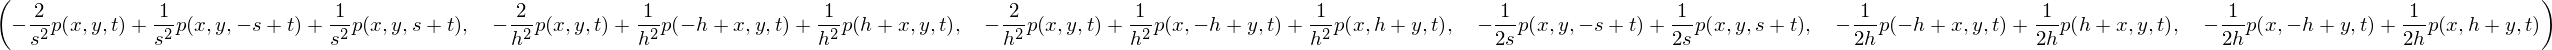

In [3]:
dtt=as_finite_diff(p(x,y,t).diff(t,t), [t-s,t, t+s])
dt=as_finite_diff(p(x,y,t).diff(t), [t-s, t+s])
# Spacial finite differences can easily be extended to higher order by increasing the list of sampling point in the next expression. 
# Be sure to keep this stencil symmetric and everything else in the notebook will follow.
dxx=as_finite_diff(p(x,y,t).diff(x,x), [x-h,x, x+h]) 
dyy=as_finite_diff(p(x,y,t).diff(y,y), [y-h,y, y+h])
dy=as_finite_diff(p(x,y,t).diff(y), [y-h, y+h])
dx=as_finite_diff(p(x,y,t).diff(x), [x-h, x+h])
dyr=as_finite_diff(b(x,y).diff(y), [y-h, y+h])
dxr=as_finite_diff(b(x,y).diff(x), [x-h, x+h])
dtt,dxx,dyy,dt,dx,dy